In [25]:
from maze import Maze, plot_action_values,plot_policy
import numpy as np
import matplotlib.pyplot as plt

In [26]:
env = Maze()

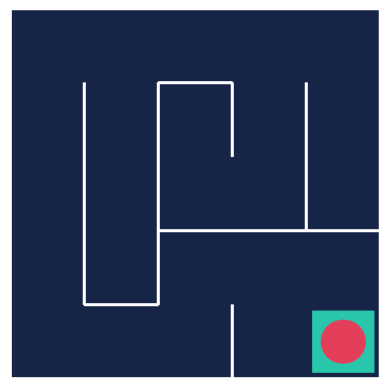

In [27]:
frame = env.render(mode = 'rgb_array')
plt.axis('off')
plt.imshow(frame)

In [28]:
print(f'Observation shape: {env.observation_space.nvec}')
print(f'Number of actions: {env.action_space.n}')

Observation shape: [5 5]
Number of actions: 4


In [29]:
#create q table
action_values =  np.zeros(shape = (5,5,4))

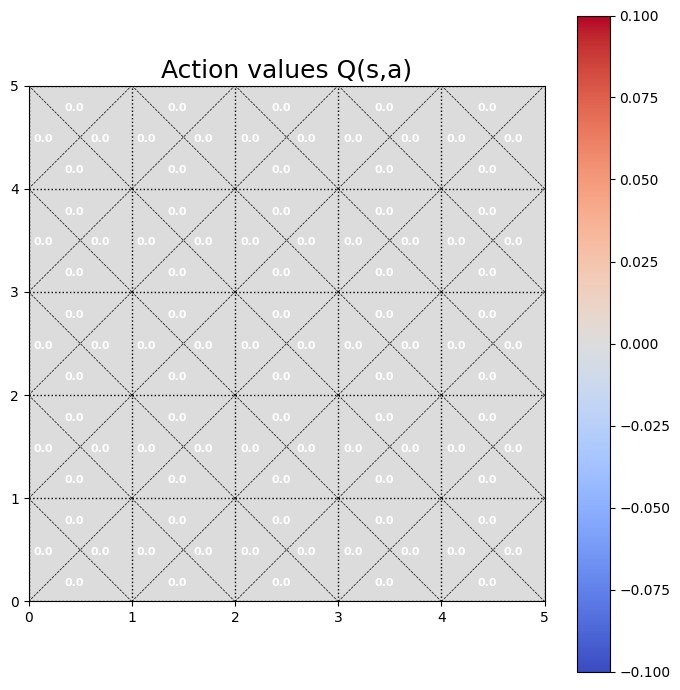

In [30]:
plot_action_values(action_values)

In [31]:
import random
def policy(state, epsilon = 0.):
    if random.random()<epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [32]:
action = policy((0,0))
print(f'Action taken in state (0,0): {action}')


Action taken in state (0,0): 0


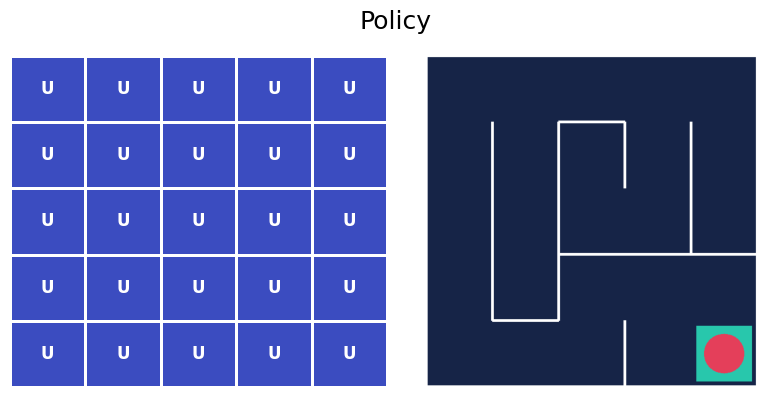

In [33]:
plot_policy(action_values,frame)

In [22]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon = 0.2):
    sa_returns = {}
    for episodes in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [23]:
on_policy_mc_control(policy, action_values, episodes = 10000)

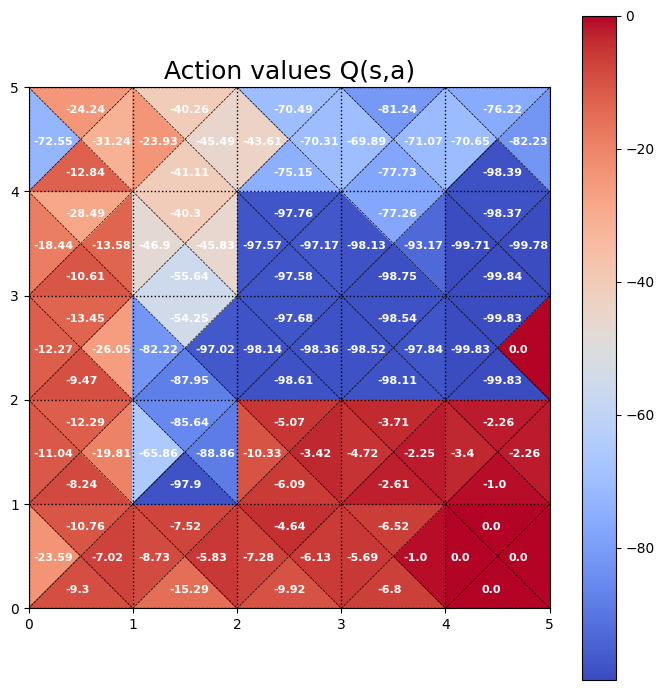

In [27]:
plot_action_values(action_values)

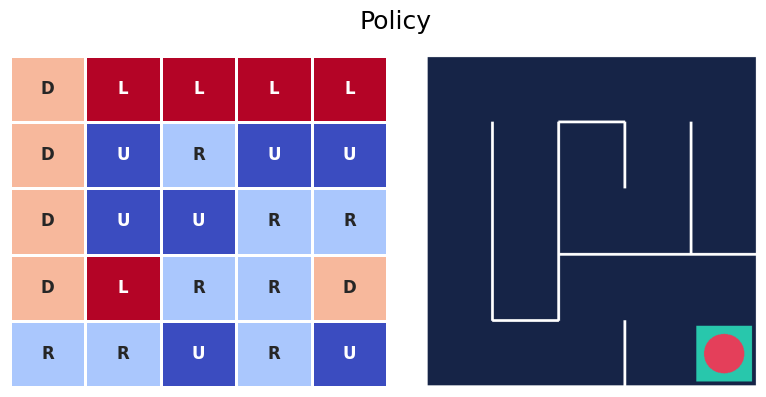

In [28]:
plot_policy(action_values, frame)

In [29]:
test_agent(env, policy)

C:\Users\hebli\AppData\Local\Temp\ipykernel_13720\1666327301.py:215: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use(orig_backend)
